<a href="https://colab.research.google.com/github/drskprabhakar/Axial-Length-Prediction-ML-Regression-mode/blob/main/1033_(auc62)Fundus_images_cnn_binary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import os
import numpy as np
os.listdir('/content/drive/MyDrive/Normal Fundus Images/spilt/train')

['left eye fundus', 'right eye fundus']

In [8]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1/255)

traindata = datagen.flow_from_directory('/content/drive/MyDrive/Normal Fundus Images/spilt/train',
                                        target_size=(32,32),
                                        class_mode='binary')

valdata = datagen.flow_from_directory('/content/drive/MyDrive/Normal Fundus Images/spilt/val',
                                        target_size=(32,32),
                                        class_mode='binary')

testdata = datagen.flow_from_directory('/content/drive/MyDrive/Normal Fundus Images/spilt/test',
                                        target_size=(32,32),
                                        class_mode='binary')


Found 721 images belonging to 2 classes.
Found 206 images belonging to 2 classes.
Found 106 images belonging to 2 classes.


In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([Conv2D(32,(3,3), activation='relu', input_shape=(32,32,3)),
                    MaxPooling2D(2,2),

                    Conv2D(64,(3,3), activation='relu'),
                    MaxPooling2D(2,2),
                    Conv2D(64,(3,3), activation='relu'),
                    MaxPooling2D(2,2),

                    Flatten(),
                    Dense(128, activation='relu'),
                    Dense(128,activation='relu'),
                    Dense(1, activation='sigmoid')])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 2, 2, 64)         

In [158]:
model.fit(traindata,
          batch_size=32,
          epochs=3,
          validation_data=valdata)
model.save('binary_model.keras')

Epoch 1/3
23/23 [==============================] - 13s 549ms/step - loss: 0.0031 - accuracy: 0.9986 - val_loss: 0.2137 - val_accuracy: 0.9660
Epoch 2/3
23/23 [==============================] - 10s 448ms/step - loss: 0.0027 - accuracy: 0.9986 - val_loss: 0.2191 - val_accuracy: 0.9709
Epoch 3/3
23/23 [==============================] - 9s 416ms/step - loss: 0.0026 - accuracy: 0.9972 - val_loss: 0.2283 - val_accuracy: 0.9660


In [180]:
predictions = model.predict(testdata)

4/4 [==============================] - 1s 211ms/step


In [181]:
predictions[predictions<0.5]=0
predictions[predictions>0.5]=1

In [151]:
y_true = testdata.classes

In [182]:
from sklearn import metrics
metrics.confusion_matrix(y_true, predictions)

array([[34, 19],
       [21, 32]])

In [183]:
print(metrics.classification_report(y_true, predictions))

              precision    recall  f1-score   support

           0       0.62      0.64      0.63        53
           1       0.63      0.60      0.62        53

    accuracy                           0.62       106
   macro avg       0.62      0.62      0.62       106
weighted avg       0.62      0.62      0.62       106



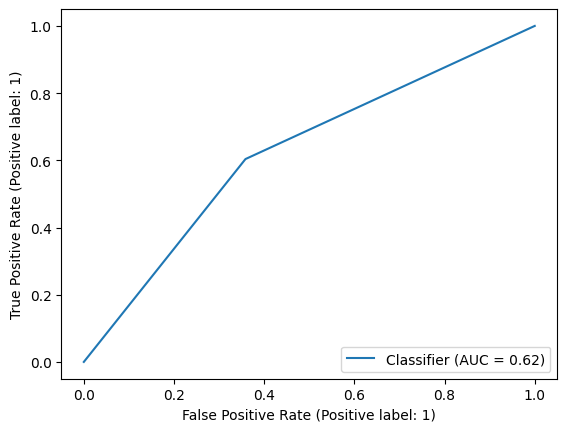

In [185]:
metrics.RocCurveDisplay.from_predictions(y_true, predictions)